In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('events.csv',low_memory=False)
#df.head()

# Analisis geografico de las visitas a Trocafone

In [3]:
#Quitar los paises NaN para conocer si hubo alguna venta de un pais conocido
dfchico=df.loc[(df['city'].isnull())==False,:]
dfchico['event'].value_counts()

visited site    87378
Name: event, dtype: int64

In [4]:
#Como los datos permiten saber desde que pais se visito el sitio, el 3.51% 
#(Visitas totales= 87378, visitas brasil 84308, vistas otro lado=3070)


In [5]:
#Fijarse si el fin de semana mas gente esta al pedo y compra mas celulares

In [6]:
df['time'] = pd.to_datetime(df['timestamp'])
df['month'] = df['time'].dt.month

In [7]:
#Si es nueva la API que toma el pais y region, asumir que todo es brasil
visitas = df['month'].value_counts().sort_index()
visitas.index = ['Enero','Febrero','Marzo','Abril','Mayo','Junio']

# Visitas en función del mes

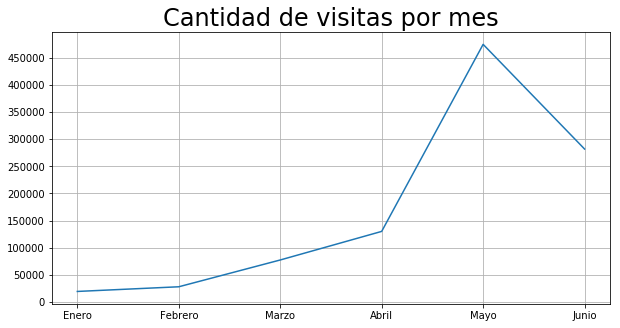

In [73]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=5
plt.rcParams["figure.figsize"] = fig_size
plt.yticks(range(0,500000,50000))
plt.grid()
plt.plot(visitas)
plt.title('Cantidad de visitas por mes',size=24)
plt.show()*-


In [50]:
df['diasquepasaron'] = (df['time'] - pd.to_datetime('2018-01-01 00:00:00')).dt.days

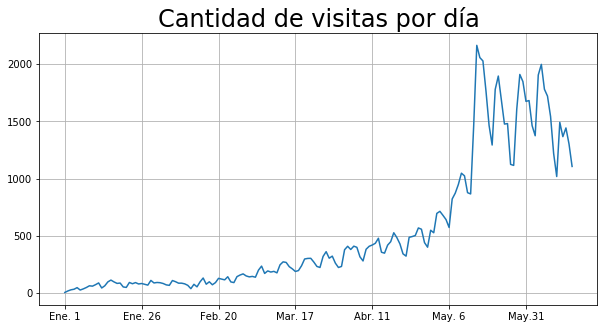

In [72]:
d = df.loc[df['event']=='visited site']['diasquepasaron'].value_counts().sort_index()
plt.xticks([0,25,50,75,100,125,150,175],['Ene. 1','Ene. 26','Feb. 20','Mar. 17','Abr. 11','May. 6','May.31','Jun. 15'])
plt.plot(d)
plt.grid()
plt.title('Cantidad de visitas por día',size=24)
plt.show()

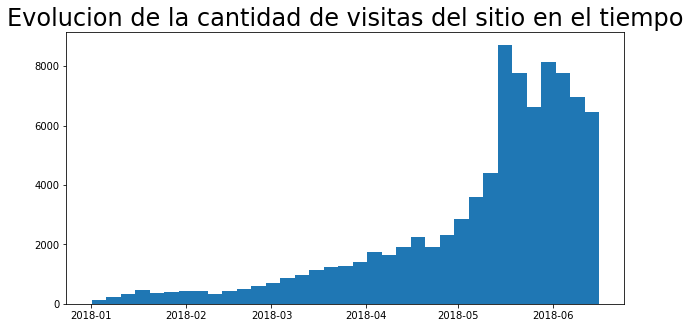

In [70]:
d = df.loc[df['event']=='visited site']['time']
plt.hist(d,bins=35)
plt.title('Evolucion de la cantidad de visitas del sitio en el tiempo',size=24)
plt.show()

# ¿Los datos de junio estan incompletos?

In [9]:
df['dia'] = df['time'].dt.day
junio = df.loc[df['month']==6]

In [10]:
dias = junio['dia'].value_counts().sort_index()
d = dias.to_frame()
d.columns = ['Cant. Eventos']
d

,Cant. Eventos
1,20528
2,19113
3,16630
4,22651
5,25705
6,22281
7,22879
8,18442
9,15493
10,13122


#### Los datos de junio llegan unicamente hasta el dia 15, por eso hay menos en los graficos anteriores